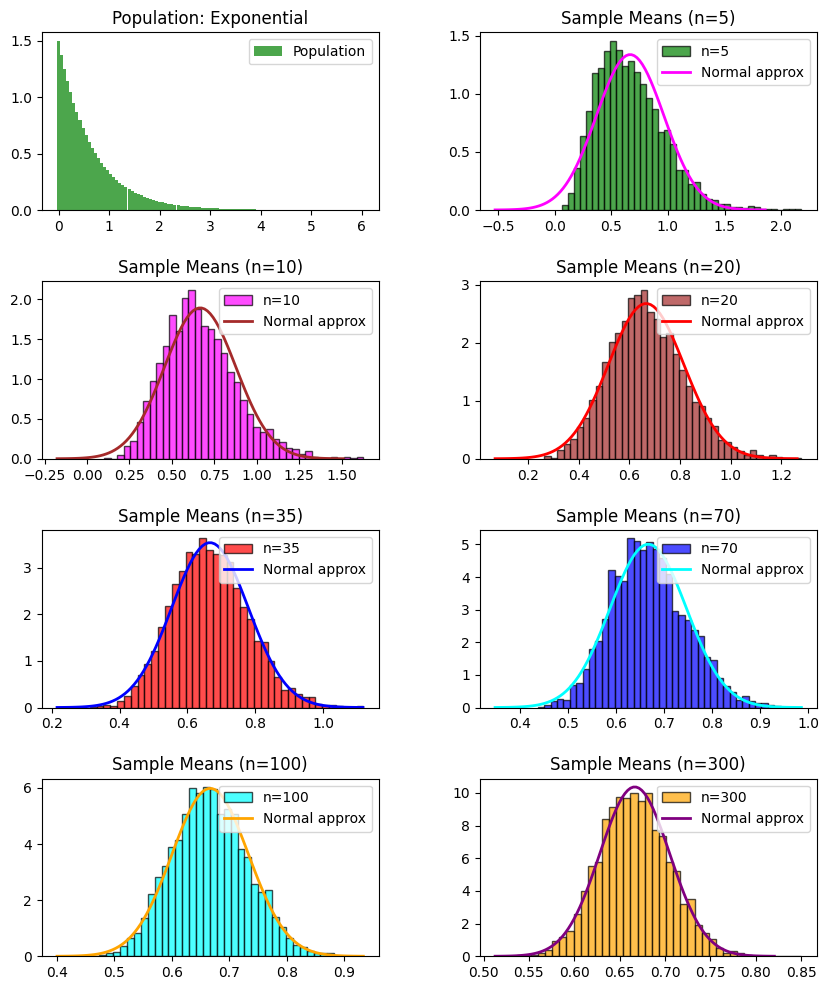

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Parameters
no_trial = 4000        # number of repetitions for each sample size
lmd = 1.5              # rate parameter of the exponential distribution
colours = ['green', 'magenta', 'brown', 'red', 'blue', 'cyan', 'orange', 'purple']
sample_lens = [5, 10, 20, 35, 70, 100, 300]  # sample sizes to test

# Function to compute sample means
def mean_dist(sl, no_trial=no_trial, scale=1/lmd):
    means = []
    for _ in range(no_trial):
        sample = np.random.exponential(scale=scale, size=sl)
        means.append(np.mean(sample))
    return means

# Function to create normal shroud (PDF) for sample means
def normal_shroud(mu, sigma, lng=100):
    xs = np.linspace(mu - 4*sigma, mu + 4*sigma, lng)
    ys = norm.pdf(xs, mu, sigma)
    return xs, ys

# Generate sample means for each sample size
means_list = [mean_dist(sl) for sl in sample_lens]

# Plotting
fig, ax = plt.subplots(4, 2, figsize=(10, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot population
xs = np.linspace(0, 6, 100)
ys = lmd * np.exp(-lmd * xs)  # exponential PDF
ax[0, 0].bar(xs, ys, width=0.06, color='green', label='Population', alpha=0.7)
ax[0, 0].set_title('Population: Exponential')
ax[0, 0].legend()

# Plot sample means with normal shroud overlay
for k, sl in enumerate(sample_lens):
    r, c = divmod(k+1, 2)  # +1 because 0th plot is population
    data = means_list[k]
    # Plot histogram
    ax[r, c].hist(data, bins=40, color=colours[k], density=True, ec='black', alpha=0.7, label=f'n={sl}')
    
    # Compute theoretical normal curve for sample means
    mu_theory = 1/lmd  # mean of exponential
    sigma_theory = (1/lmd)/np.sqrt(sl)  # std dev of sample mean
    xs_shroud, ys_shroud = normal_shroud(mu_theory, sigma_theory)
    
    # Overlay normal curve using next colour
    ax[r, c].plot(xs_shroud, ys_shroud, color=colours[(k+1)%len(colours)], lw=2, label='Normal approx')
    
    ax[r, c].set_title(f'Sample Means (n={sl})')
    ax[r, c].legend()

plt.show()
fig.savefig('img/expon_n_samples_with_shroud.png')
